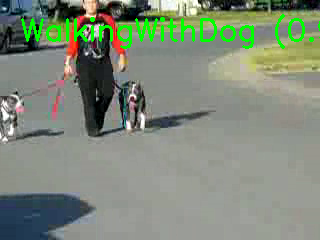

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, clear_output
from PIL import Image

# Load the trained model
model = load_model("C:/Users/umasi/Documents/projects/Eoc and MFC/convlstm_model_Date_Time_2025_04_20_15_40_51__Loss_0.8302379846572876__Accuracy_0.7345132827758789.keras")

# ✅ Updated UCF50 class labels
class_labels = [
    "PullUps", "PushUps", "Diving", "Basketball", "Biking", "HorseRace", "Punch", "WalkingWithDog", "BenchPress", "HighJump"
]

# Parameters
clip_length = 20
img_height, img_width = 64, 64

# 🔁 Replace with your video file path
video_path = "C:/Users/umasi/Documents/projects/Eoc and MFC/test videos/v_WalkingWithDog_g01_c04.avi"
cap = cv2.VideoCapture(video_path)

frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize and preprocess
    frame_resized = cv2.resize(frame, (img_width, img_height))
    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)

    # If enough frames for one clip
    if len(frames) == clip_length:
        input_clip = np.array(frames, dtype=np.float32) / 255.0
        input_clip = np.expand_dims(input_clip, axis=0)  # (1, 20, 64, 64, 3)

        # Predict
        preds = model.predict(input_clip)[0]
        label_idx = np.argmax(preds)
        label = class_labels[label_idx]
        confidence = preds[label_idx]

        # Display result
        cv2.putText(frame, f'{label} ({confidence:.2f})', (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Convert frame from BGR to RGB for display
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(rgb_frame)

        # Display in notebook
        clear_output(wait=True)
        display(img)

        # Slide window
        frames = frames[1:]

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
